In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from IPython.display import Image, display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib
import os


c:\Users\ediad\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print('Formato do dataset:', df.shape)
df.info()
print('\nValores nulos por coluna:')
print(df.isnull().sum())

Formato do dataset: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Valores nulos por coluna:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score      

In [4]:
# Estatísticas descritivas das colunas de notas

print('Estatísticas das notas:')
df[['math score', 'reading score', 'writing score']].describe()

Estatísticas das notas:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


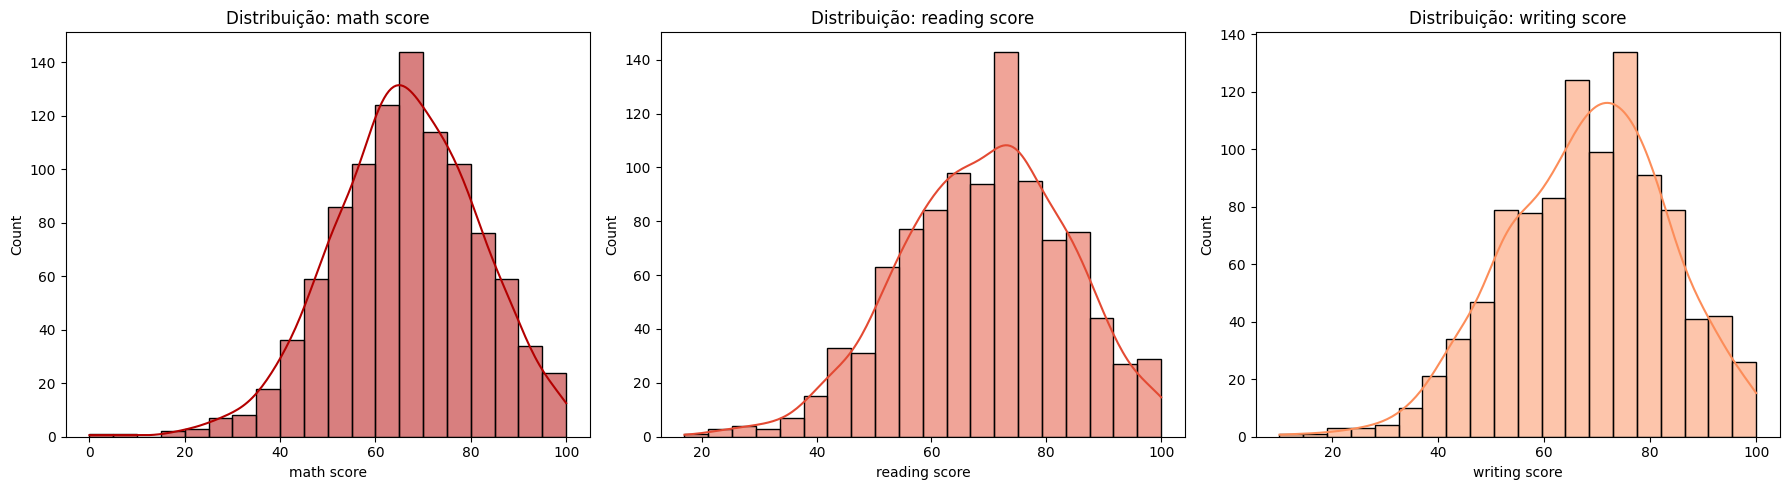

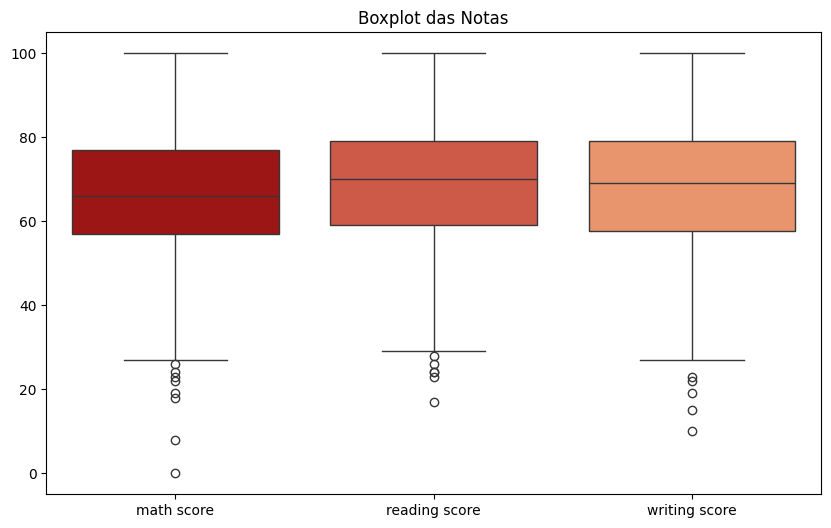

In [5]:
os.makedirs('imagens', exist_ok=True)

# Tons de vermelho para os histogramas
red_palette = ['#b30000', '#e34a33', '#fc8d59']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['math score', 'reading score', 'writing score']):
    sns.histplot(df[col], bins=20, ax=axes[idx], kde=True, color=red_palette[idx])
    axes[idx].set_title(f'Distribuição: {col}')
plt.tight_layout()
plt.savefig('imagens/histograma_notas.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette=red_palette)
plt.title('Boxplot das Notas')
plt.savefig('imagens/boxplot_notas.png')
plt.show()

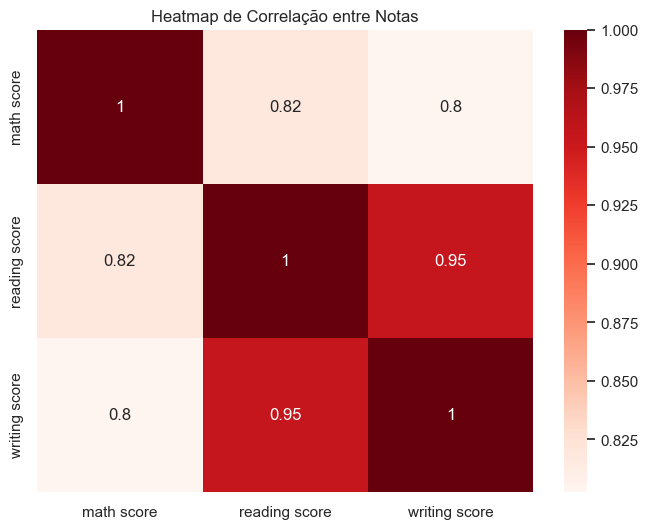

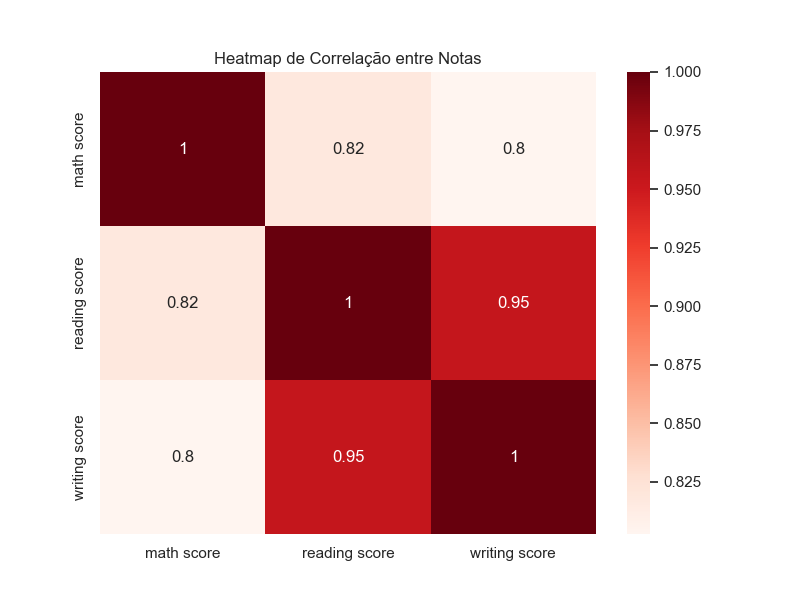

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Heatmap de Correlação entre Notas')
plt.savefig('imagens/heatmap_correlacao.png')
plt.show()

Médias das notas por gênero:
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

Médias das notas por grupo étnico:
                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<Figure size 1000x500 with 0 Axes>

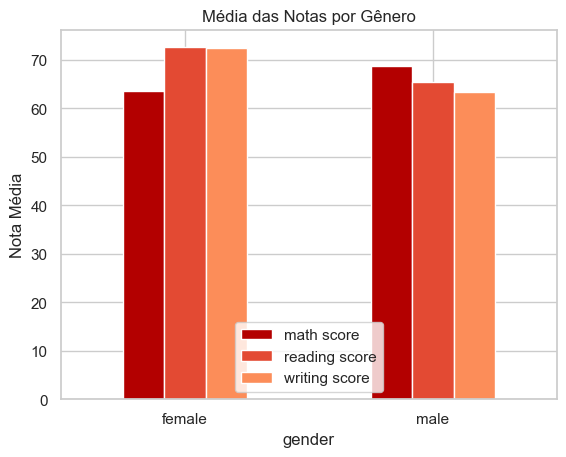

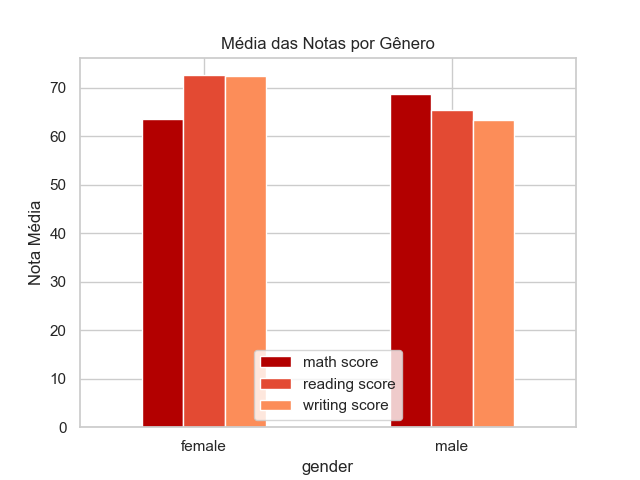

<Figure size 1000x500 with 0 Axes>

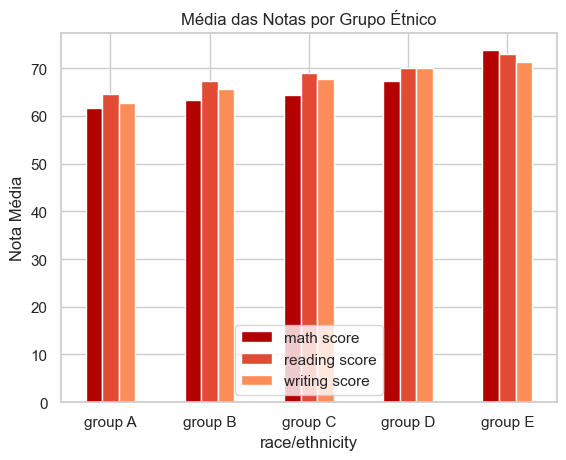

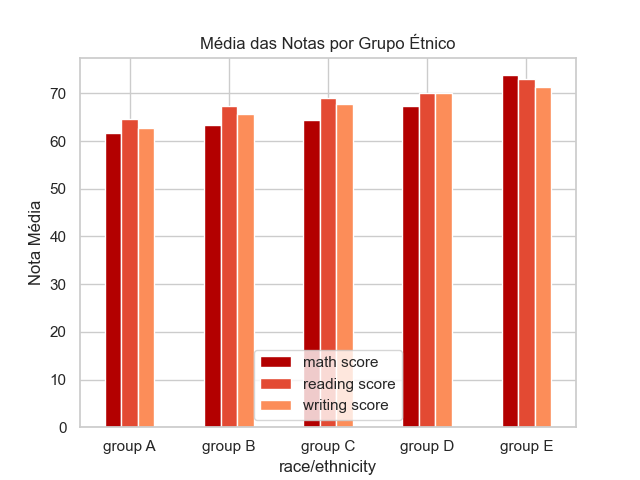

In [ ]:
# Médias das notas por gênero
gender_group = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print('Médias das notas por gênero:')
print(gender_group)

# Médias das notas por grupo étnico
ethnic_group = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print('\nMédias das notas por grupo étnico:')
print(ethnic_group)

# Visualização - Gênero
plt.figure(figsize=(10, 5))
gender_group.plot(kind='bar', color=['#b30000', '#e34a33', '#fc8d59'])  # tons de vermelho do mais forte ao mais fraco
plt.title('Média das Notas por Gênero')
plt.ylabel('Nota Média')
plt.xticks(rotation=0)
plt.savefig('imagens/barplot_genero.png')
plt.show()


# Visualização - Grupo Étnico
plt.figure(figsize=(10, 5))
ethnic_group.plot(kind='bar', color=['#b30000', '#e34a33', '#fc8d59'])  # tons de vermelho do mais forte ao mais fraco
plt.title('Média das Notas por Grupo Étnico')
plt.ylabel('Nota Média')
plt.xticks(rotation=0)
plt.savefig('imagens/barplot_etnia.png')
plt.show()

In [ ]:
# Verificar valores ausentes
print('Valores nulos por coluna:')
print(df.isnull().sum())

# Codificar variáveis categóricas
le = LabelEncoder()

# Lista de colunas categóricas
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print('Exemplo de dados após codificação:')
df.head()

Valores nulos por coluna:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


NameError: name 'LabelEncoder' is not defined

In [ ]:
# Normalização das colunas de notas
scaler = MinMaxScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])
print('Exemplo de dados após normalização:')
df.head()

Exemplo de dados após normalização:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.72,0.662651,0.711111
1,0,2,4,1,0,0.69,0.879518,0.866667
2,0,1,3,1,1,0.90,0.939759,0.922222
3,1,0,0,0,1,0.47,0.481928,0.377778
4,1,2,4,1,1,0.76,0.734940,0.722222


In [ ]:

# Selecionar features e target
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df['math score']  # Exemplo: prever nota de matemática (pode ajustar para classificação)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Formato treino:', X_train.shape, y_train.shape)
print('Formato teste:', X_test.shape, y_test.shape)

Formato treino: (800, 5) (800,)
Formato teste: (200, 5) (200,)


In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']  # Removido 'auto' para evitar erro
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
print('Melhores hiperparâmetros:', grid_search.best_params_)

Melhores hiperparâmetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}


In [ ]:
# Avaliação do modelo otimizado
y_pred_best = best_tree.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'MSE otimizado: {mse_best:.2f}')
print(f'R² otimizado: {r2_best:.2f}')

MSE otimizado: 0.02
R² otimizado: 0.06


Distribuição das classes (y_visu):
math score
1    677
0    323
Name: count, dtype: int64
Imagem PNG salva como imagens\arvore_decisao_visual_otimizada.png


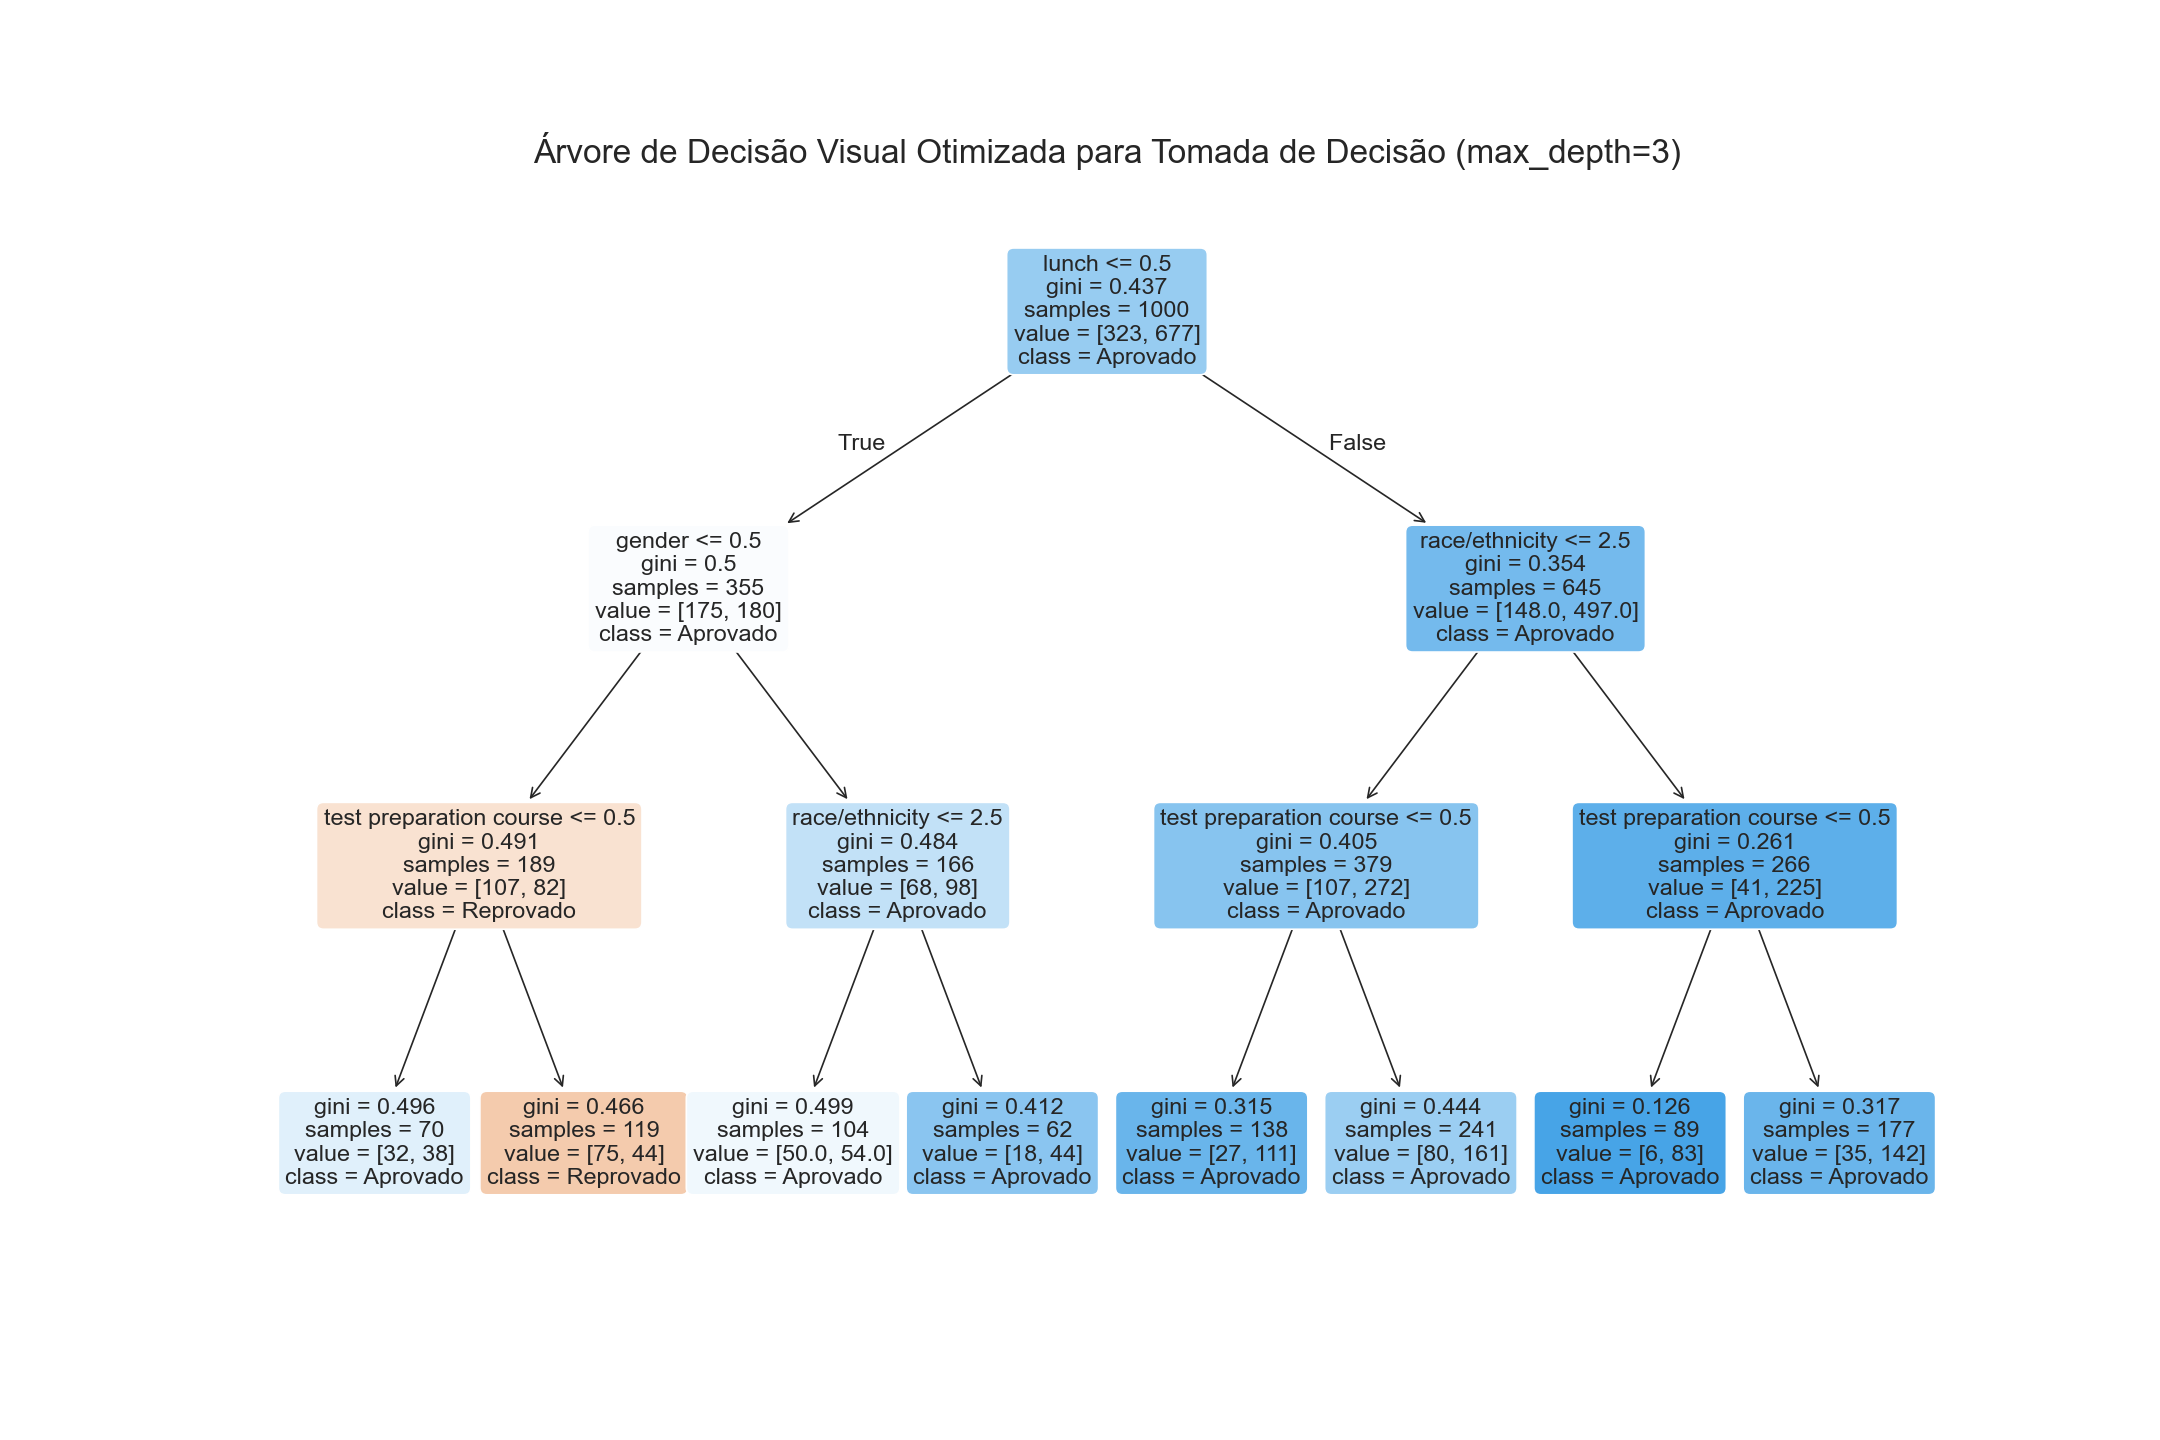

In [ ]:
# Visualização da árvore de decisão otimizada para tomada de decisão
matplotlib.use('Agg')

# Diretório de imagens relativo ao notebook
img_dir = 'imagens'
os.makedirs(img_dir, exist_ok=True)

# Dados para classificação
X_visu = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y_visu = (df['math score'] >= 0.6).astype(int)  # 1 = aprovado, 0 = reprovado (ajustado para dados normalizados)

# Verificar distribuição das classes
print('Distribuição das classes (y_visu):')
print(y_visu.value_counts())

if len(y_visu.unique()) < 2:
    print('O target possui apenas uma classe. Não é possível treinar a árvore de decisão.')
else:
    clf_otimizada = DecisionTreeClassifier(
        max_depth=3,
        min_samples_split=best_tree.get_params().get('min_samples_split', 2),
        min_samples_leaf=best_tree.get_params().get('min_samples_leaf', 1),
        max_features=best_tree.get_params().get('max_features', None),
        random_state=42
    )
    clf_otimizada.fit(X_visu, y_visu)

    fig = plt.figure(figsize=(18, 12), dpi=120)
    tree.plot_tree(
        clf_otimizada,
        feature_names=X_visu.columns,
        class_names=['Reprovado', 'Aprovado'],
        filled=True,
        rounded=True,
        fontsize=14
    )
    plt.title('Árvore de Decisão Visual Otimizada para Tomada de Decisão (max_depth=3)', fontsize=20)
    img_path = os.path.join(img_dir, 'arvore_decisao_visual_otimizada.png')
    plt.savefig(img_path)
    plt.close(fig)

    print(f'Imagem PNG salva como {img_path}')
    display(Image(filename=img_path))